In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("dataset_sdn.csv")
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


1.DATA PREPROCESSING


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [7]:
#COLUMN NAMES
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

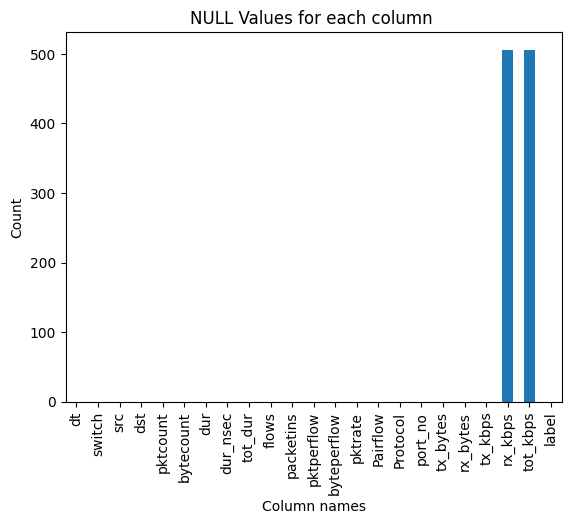

In [8]:
# Null values sum 
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [9]:
# Dropping rows having null values
df=df.dropna()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-

In [11]:
# Getting unique destination 
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination : ", total_dst)
print("Different destination : ",uniq_dest)

Total destination :  18
Different destination :  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

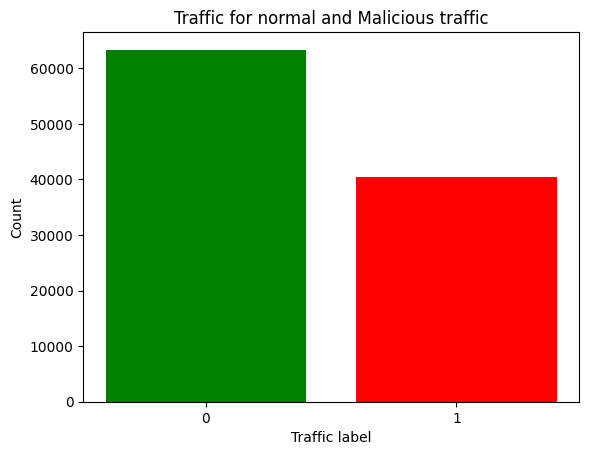

In [12]:
# Doing analysis for malicious and normal traffic 
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

Text(0.5, 1.0, 'Attack and Normal traffic ')

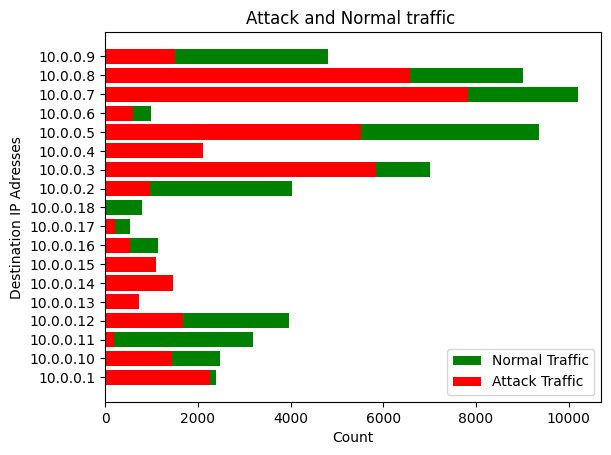

In [13]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='g', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='r', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Adresses")
plt.title("Attack and Normal traffic ")


In [14]:
# Columns containing object(string) type data
# Port no column also does not do much so ignoring it also
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)

# seperating data based on protocol
udp_df = df[df['Protocol']=='UDP'].drop(columns=object_col)
tcp_df = df[df['Protocol']=='TCP'].drop(columns=object_col)
icmp_df = df[df['Protocol']=='ICMP'].drop(columns=object_col)
icmp_df

['src', 'dst', 'Protocol', 'port_no']


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
46116,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
46117,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5457,3104,0,0.0,0.0,0
46118,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3227,3185,0,0.0,0.0,0
46119,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3357,1122,0,0.0,0.0,0
46120,26657,8,20,1960,21,43000000,2.104300e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,15209,12720,1,1.0,2.0,0


2.DATA MODEL BUILDING

KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

UDP

In [16]:
udp_train,udp_test, udp_train_label, udp_test_label= train_test_split(udp_df[udp_df.columns[:-1]],udp_df['label'],test_size=0.3,random_state=42)

X = udp_train
y = udp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(udp_test, udp_test_label))

0.9621158690176322


TCP

In [17]:
tcp_train,tcp_test, tcp_train_label, tcp_test_label= train_test_split(tcp_df[tcp_df.columns[:-1]],tcp_df['label'],test_size=0.3,random_state=42)


X = tcp_train
y = tcp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)



# Calculate the accuracy of the model
print(knn.score(tcp_test, tcp_test_label))

0.7990035103612275


ICMP

In [18]:
icmp_train,icmp_test, icmp_train_label, icmp_test_label= train_test_split(icmp_df[icmp_df.columns[:-1]],icmp_df['label'],test_size=0.3,random_state=42)

X = icmp_train
y = icmp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)



# Calculate the accuracy of the model
print(knn.score(icmp_test, icmp_test_label))

0.9244978623860611


SVM

In [19]:
from sklearn import svm

UDP

In [20]:
clf= svm.SVC(kernel='poly')
clf.fit(udp_train,udp_train_label)



clf.score(udp_test,udp_test_label)

0.6605541561712847

TCP

In [21]:
clf= svm.SVC()
clf.fit(tcp_train,tcp_train_label)
metrics.accuracy_score(clf.predict(tcp_test),tcp_test_label)

0.6720643188766844

ICMP

In [22]:
clf= svm.SVC()
clf.fit(icmp_train,icmp_train_label)
metrics.accuracy_score(clf.predict(icmp_test),icmp_test_label)

0.7991449544244575

NAIVE BAYES

In [23]:
from sklearn.naive_bayes import GaussianNB

UDP

In [24]:
nb=GaussianNB()
nb.fit(udp_train,udp_train_label)



metrics.accuracy_score(nb.predict(udp_test),udp_test_label)

0.796272040302267

TCP

In [25]:
nb=GaussianNB()
nb.fit(tcp_train,tcp_train_label)
metrics.accuracy_score(nb.predict(tcp_test),tcp_test_label)

0.6558713622466312

ICMP

In [26]:
nb=GaussianNB()
nb.fit(icmp_train,icmp_train_label)
metrics.accuracy_score(nb.predict(icmp_test),icmp_test_label)

0.9717673630717109

HYBRID MODEL TESTING

In [27]:
train_x_udp,val_x_udp,train_y_udp,val_y_udp=train_test_split(udp_train,udp_train_label,stratify=udp_train_label,test_size=0.2,random_state=0)
train_x_tcp,val_x_tcp,train_y_tcp,val_y_tcp=train_test_split(tcp_train,tcp_train_label,stratify=tcp_train_label,test_size=0.2,random_state=0)
train_x_icmp,val_x_icmp,train_y_icmp,val_y_icmp=train_test_split(icmp_train,icmp_train_label,stratify=icmp_train_label,test_size=0.2,random_state=0)

In [28]:
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(train_x_udp,train_y_udp)

knn_udp_pred_val=model1.predict(val_x_udp)
knn_udp_pred_val=pd.DataFrame(knn_udp_pred_val)

knn_udp_test_val=model1.predict(udp_test)
knn_udp_test_val=pd.DataFrame(knn_udp_test_val)



In [29]:
model1=svm.SVC()
model1.fit(train_x_udp,train_y_udp)

svm_udp_pred_val=model1.predict(val_x_udp)
svm_udp_pred_val=pd.DataFrame(svm_udp_pred_val)

svm_udp_test_val=model1.predict(udp_test)
svm_udp_test_val=pd.DataFrame(svm_udp_test_val)

In [30]:
model1=GaussianNB()
model1.fit(train_x_udp,train_y_udp)

nb_udp_pred_val=model1.predict(val_x_udp)
nb_udp_pred_val=pd.DataFrame(nb_udp_pred_val)

nb_udp_test_val=model1.predict(udp_test)
nb_udp_test_val=pd.DataFrame(nb_udp_test_val)

In [31]:
rf_udp_input=pd.concat([pd.DataFrame(val_x_udp),nb_udp_pred_val,knn_udp_pred_val,svm_udp_pred_val],axis=1)
rf_udp_test=pd.concat([pd.DataFrame(udp_test),nb_udp_test_val,knn_udp_test_val,svm_udp_test_val])


rf_udp_input.drop([0],axis=1)


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
17006,9876.0,5.0,29271.0,30500382.0,93.0,437000000.0,9.343700e+10,3.0,1910.0,9606.0,10009452.0,320.0,0.0,89742608.0,3572.0,7675.0,0.0,7675.0
29929,3339.0,6.0,42914.0,44716388.0,137.0,293000000.0,1.370000e+11,4.0,7916.0,9376.0,9769792.0,312.0,0.0,5270.0,573724768.0,0.0,10276.0,10276.0
17347,11485.0,5.0,97496.0,101590832.0,310.0,801000000.0,3.110000e+11,2.0,1943.0,9306.0,9696852.0,310.0,0.0,3775.0,1242.0,0.0,0.0,0.0
31780,3519.0,7.0,95567.0,99580814.0,317.0,524000000.0,3.180000e+11,2.0,7916.0,8304.0,8652768.0,276.0,0.0,5699.0,664284495.0,0.0,2284.0,2284.0
30098,3579.0,6.0,112404.0,117124968.0,377.0,417000000.0,3.770000e+11,2.0,7916.0,8660.0,9023720.0,288.0,0.0,261150027.0,4817.0,2395.0,0.0,2395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(rf_udp_input,rf_udp_test)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\srisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\srisa\AppData\Local\Temp\ipykernel_14292\2100209076.py", line 2, in <module>
    rf.fit(rf_udp_input,rf_udp_test)
  File "C:\Users\srisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\Users\srisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 529, in _validate_data
    self._check_feature_names(X, reset=reset)
  File "C:\Users\srisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo